---

**Load essential libraries**

---

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision = 2, suppress = True)
import sys
from scipy import linalg

import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from scipy.sparse import random
from scipy import stats

---

Mount Google Drive folder if running Google Colab

---

---

Load ICU data

---

In [3]:
## Load data
FILE = 'D:\MSIS\APS\Data\ICU_Complete.csv'
dfICU = pd.read_csv(FILE)
dfICU.head()

,Length_of_stay,In-hospital_death,Age,Gender,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight,MechVent
0,8,No,76,Male,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6,Yes
1,6,Yes,78,Female,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4,Yes
2,8,No,74,Male,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1,Yes
3,7,No,71,Female,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8,Yes
4,11,No,78,Male,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4,Yes


---

Create a list of categorical and continuous features

---

In [4]:
## Create a list of categorical and continuous features
categorical_features = ['In-hospital_death', 'Gender', 'MechVent']
continuous_features = dfICU.columns[~dfICU.columns.isin(categorical_features)].to_list()
dfICU.dtypes

Length_of_stay         int64
In-hospital_death     object
Age                    int64
Gender                object
Height               float64
DiasABP_first          int64
Glucose_first          int64
HR_first             float64
Temp_first           float64
PaCO2_first            int64
PaO2_first             int64
Platelets_first        int64
WBC_first            float64
Weight               float64
MechVent              object
dtype: object

---

Convert categorical features to the categorical type

---

In [5]:
dfICU[categorical_features] = dfICU[categorical_features].astype('category')
dfICU.dtypes

Length_of_stay          int64
In-hospital_death    category
Age                     int64
Gender               category
Height                float64
DiasABP_first           int64
Glucose_first           int64
HR_first              float64
Temp_first            float64
PaCO2_first             int64
PaO2_first              int64
Platelets_first         int64
WBC_first             float64
Weight                float64
MechVent             category
dtype: object

---

$\color{yellow}{\textbf{Complete this}}$

Principal component analysis (PCA) of the dataset using the continuous features. For that, extract the dataframe comprising the continuous features.

---

In [10]:
## Extract dataframe comprising the continuous features
dfICU_continuous =dfICU[continuous_features]
dfICU_continuous.head(10)

,Length_of_stay,Age,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight
0,8,76,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6
1,6,78,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4
2,8,74,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1
3,7,71,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8
4,11,78,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4
5,5,40,165.1,58,114,79.0,35.7,86,368,209,13.0,90.7
6,7,58,188.0,65,213,119.0,36.8,46,328,244,22.2,106.0
7,20,46,152.4,71,163,80.0,36.4,48,168,505,22.1,88.6
8,16,66,167.6,58,270,84.0,37.6,34,155,124,9.1,80.0
9,14,78,170.2,57,127,95.0,35.0,47,415,90,2.2,61.3


---

$\color{yellow}{\textbf{Complete this}}$

Make a scatter plot between heart rate and Temperature

---

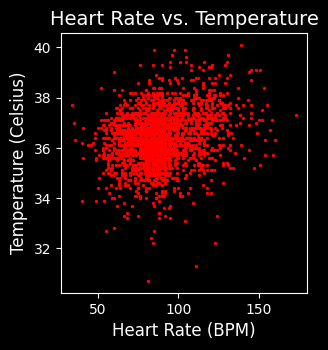

In [20]:
## Scatter plot between heart rate and temperature
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.scatter(dfICU_continuous['HR_first'], dfICU_continuous['Temp_first'], s = 2.0, color = 'red')
ax.set_xlabel('Heart Rate (BPM)', fontsize = 12)
ax.set_ylabel('Temperature (Celsius)', fontsize = 12)
ax.set_title('Heart Rate vs. Temperature', fontsize = 14);

---

$\color{yellow}{\textbf{Complete this}}$

Calculate the variance of heart rates from scratch and using the in-built function in numpy


---

In [12]:
## Variance of heart rates
print(np.mean((dfICU_continuous['HR_first']-np.mean(dfICU_continuous['HR_first']))**2))
print(np.var(dfICU_continuous['HR_first']))

342.51247099682314
342.51247099682314


---

$\color{yellow}{\textbf{Complete this}}$

Calculate the variance of temperatures from scratch and using the in-built function in numpy


---

In [13]:
## Variance of temperatures
print(np.var(dfICU_continuous['Temp_first']))

1.0801301886129595


---

$\color{yellow}{\textbf{Complete this}}$

Calculate the covariance between heart rate and temperature from scratch and using the in-built function in numpy


---

In [31]:
## Covariance between heart rate and temp
# Calculate the means
mean_hr = np.mean(dfICU_continuous['HR_first'])
mean_temp = np.mean(dfICU_continuous['Temp_first'])

# Calculate the covariance
covariance = np.sum((dfICU_continuous['HR_first'] - mean_hr) * (dfICU_continuous['Temp_first'] - mean_temp)) / (dfICU_continuous.shape[0] - 1)

print(covariance)

print(np.cov(dfICU_continuous['HR_first'], dfICU_continuous['Temp_first']))

4.879632290311694
[[342.66   4.88]
 [  4.88   1.08]]


Interpretation
Variance: The diagonal elements represent the variance of each variable. Variance measures how much the values of a variable deviate from the mean of that variable.

342.66 indicates that HR_first has a high variance, meaning the heart rate values are spread out over a wide range.
1.08 indicates that Temp_first has a low variance, meaning the temperature values are more tightly clustered around the mean.
Covariance: The off-diagonal elements represent the covariance between the two variables. Covariance measures how much two variables change together.

4.88 indicates a positive covariance between HR_first and Temp_first, meaning that as HR_first increases, Temp_first tends to increase as well, and vice versa.

---

$\color{yellow}{\textbf{Complete this}}$

Calculate the correlation between heart rate and Temperature using the in-built function in numpy


---

In [32]:
## Correlation between heart rate and temperature using the in-built function in numpy
print(np.corrcoef(dfICU_continuous['HR_first'], dfICU_continuous['Temp_first']))

[[1.   0.25]
 [0.25 1.  ]]


Correlation: The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1.
1.0: A correlation of 1 indicates a perfect positive linear relationship.
0.25: A correlation of 0.25 indicates a weak positive linear relationship between HR_first and Temp_first. This means that as HR_first increases, Temp_first tends to increase slightly, and vice versa.

Interpretation:

Covariance: Harder to interpret due to dependency on units.
Correlation: Easier to interpret, ranges from -1 to 1.


---

$\color{yellow}{\textbf{Complete this}}$

Create a matrix comprising the standardized values of the continuous features


---

In [56]:
sc = StandardScaler()
dfICU_continuous_final=dfICU_continuous.drop('Length_of_stay',axis=1)

X=sc.fit_transform(dfICU_continuous_final)
print(X)

[[ 0.68  0.    0.43 ... -0.29 -0.81 -0.27]
 [ 0.81 -0.05 -0.82 ... -0.99  0.41 -1.65]
 [ 0.55  0.   -0.75 ... -0.51 -0.59 -0.89]
 ...
 [ 0.81  0.03 -0.23 ... -0.87  0.95  0.08]
 [ 1.6   0.01 -0.82 ...  1.32  1.99  0.  ]
 [ 0.29 -0.1  -0.01 ...  0.32  0.22 -0.38]]


---

$\color{yellow}{\textbf{Complete this}}$

Create a matrix comprising the standardized values of the continuous features


---

In [33]:
## Standardized continuous features
# sc = StandardScaler()
# X = sc.fit_transform(dfICU_continuous)
# print(X)

[[-0.54  0.68  0.   ... -0.29 -0.81 -0.27]
 [-0.7   0.81 -0.05 ... -0.99  0.41 -1.65]
 [-0.54  0.55  0.   ... -0.51 -0.59 -0.89]
 ...
 [-0.7   0.81  0.03 ... -0.87  0.95  0.08]
 [-0.38  1.6   0.01 ...  1.32  1.99  0.  ]
 [ 0.35  0.29 -0.1  ...  0.32  0.22 -0.38]]


---

$\color{yellow}{\textbf{Complete this}}$

Perform PCA with one component and rank the features in terms of the magnitude of the PCA loadings

---

In [57]:
## Create and fit PCA object
pca = PCA(n_components = 1)
print(pca.fit_transform(X))

# Print principal components
print(pca.components_ )  #first principal component direction pc-1

# Print explained variance
print(pca.explained_variance_)  #praaojected on pc-1 direction

[[-1.57]
 [ 0.07]
 [-2.81]
 ...
 [-0.37]
 [ 1.1 ]
 [-0.15]]
[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]]
[1.95]


In [45]:
dfICU_continuous_final.head()

,Age,Height,DiasABP_first,Glucose_first,HR_first,Temp_first,PaCO2_first,PaO2_first,Platelets_first,WBC_first,Weight
0,76,175.3,67,105,88.0,35.2,34,344,164,7.4,80.6
1,78,162.6,50,132,111.0,38.0,30,128,91,16.1,48.4
2,74,175.3,51,106,67.0,34.8,42,486,141,9.0,66.1
3,71,157.5,60,132,84.0,35.5,35,245,120,13.7,55.8
4,78,167.6,57,90,73.0,34.7,40,281,121,12.5,72.4


---

$\color{yellow}{\textbf{Complete this}}$

Project the 0th sample onto the PC-1 direction

---

In [58]:
## Project the 0th sample onto the PC-1 direction
np.dot(X,pca.components_[0] )

array([-1.57,  0.07, -2.81, ..., -0.37,  1.1 , -0.15])

---

$\color{yellow}{\textbf{Complete this}}$

Calculate the variance of the samples projected onto the PC-1 direction

---

In [59]:
## Calculate the variance of the samples projected onto the PC-1 direction
np.var(pca.fit_transform(X))

np.float64(1.9464946276425341)

---

$\color{yellow}{\textbf{Complete this}}$

Perform PCA with two components

---

In [60]:
# Create and fit PCA object
pca = PCA(n_components=2)
pca.fit_transform(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]
 [ 0.46  0.01 -0.37  0.16 -0.02  0.01 -0.23 -0.15  0.43  0.44 -0.41]]
[1.95 1.32]


---

$\color{yellow}{\textbf{Complete this}}$

Calculate the proportion of variance explained by projecting on to
PC-1 and onto both PC-1 and PC-2 directions

---

In [65]:
## Calculate the proportion of variance explained by projecting on to
## PC-1 and onto both PC-1 and PC-2 directions
print(np.cumsum(pca.explained_variance_))
np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)

[ 1.95  3.26  4.39  5.44  6.44  7.4   8.27  9.08  9.79 10.46 11.  ]


array([0.18, 0.3 , 0.4 , 0.49, 0.59, 0.67, 0.75, 0.83, 0.89, 0.95, 1.  ])

---

$\color{yellow}{\textbf{Complete this}}$

Perform PCA with all components and select the number of PCs such that we are able to explain at least 75% of the total variance in the data

---

In [61]:
## Perform PCA with all components and select the number of PCs such that
## we are able to explain at least 75% of the total variance in the data
# Create and fit PCA object
pca = PCA(n_components=11)
pca.fit_transform(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-0.35  0.04  0.22  0.18  0.42  0.36  0.21 -0.4   0.38  0.3   0.22]
 [ 0.46  0.01 -0.37  0.16 -0.02  0.01 -0.23 -0.15  0.43  0.44 -0.41]
 [ 0.17  0.04 -0.32  0.09 -0.29 -0.33  0.61 -0.06  0.09  0.19  0.5 ]
 [-0.06 -0.46  0.39  0.61 -0.15 -0.39 -0.23  0.06  0.07  0.11  0.09]
 [-0.15  0.8   0.23  0.11  0.03 -0.34 -0.1   0.3   0.12  0.21 -0.04]
 [ 0.23  0.35 -0.06  0.59  0.    0.13  0.07 -0.39 -0.21 -0.5  -0.08]
 [-0.07 -0.06 -0.47  0.32  0.54  0.05 -0.12  0.37 -0.38  0.2   0.19]
 [ 0.11 -0.14  0.18 -0.03  0.43 -0.35  0.56  0.   -0.13  0.02 -0.54]
 [ 0.47  0.08  0.32 -0.24  0.2  -0.14 -0.24 -0.38 -0.43  0.31  0.3 ]
 [ 0.49  0.01  0.37  0.13 -0.05  0.51  0.24  0.52  0.06  0.06  0.09]
 [ 0.28 -0.05 -0.01 -0.13  0.45 -0.27 -0.16  0.11  0.51 -0.49  0.3 ]]
[1.95 1.32 1.12 1.05 1.   0.96 0.87 0.82 0.7  0.67 0.55]


In [68]:
pca = PCA(n_components=7)
pca.fit_transform(X)

array([[-1.57, -0.26, -0.53, ...,  0.43, -0.25, -0.24],
       [ 0.07,  1.49, -1.98, ..., -0.99,  0.71,  0.96],
       [-2.81,  0.03,  0.43, ...,  0.57, -0.65,  0.03],
       ...,
       [-0.37,  0.37, -0.62, ...,  0.13, -0.79,  1.52],
       [ 1.1 ,  2.89,  0.03, ..., -0.46, -0.49, -0.05],
       [-0.15,  0.9 , -0.71, ..., -0.64, -0.05, -1.25]])

---

$\color{yellow}{\textbf{Complete this}}$


Fit a PCA model for the dataset considering only two features: (1) Heart Rate (2) Temperature

---

In [66]:
# Select the two features
features = ['HR_first', 'Temp_first']
dfICU_two_features = dfICU[features]

# Standardize the features
scaler = StandardScaler()
X_two_features = scaler.fit_transform(dfICU_two_features)

# Fit PCA
pca_two_features = PCA(n_components=2)
pca_two_features.fit(X_two_features)

# Print principal components
print(pca_two_features.components_)

# Print explained variance
print(pca_two_features.explained_variance_)


[[ 0.71  0.71]
 [ 0.71 -0.71]]
[1.25 0.75]


Text(0, 0, '')

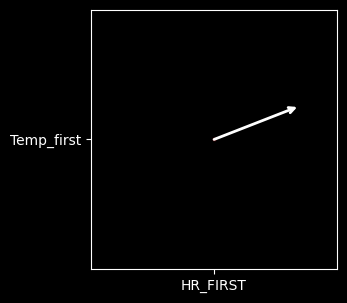

In [69]:
## Scatter plot of heart rate and temperature along with the PC vectors
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.scatter( ?,?, s = 4.0, alpha = 0.2, color = 'red')
arrowprops = dict(arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0)
ax.annotate('', xy = (pca.components_[0, 0], pca.components_[1, 0]), xytext = (0, 0), arrowprops = arrowprops)
ax.annotate('', xy = (pca.components_[0, 1], pca.components_[1, 1]), xytext = (0, 0), arrowprops = arrowprops)